# Mushroom Classification using Predictive Modeling

### Initializing Program

In [1]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the dataset
mushroom_df = pd.read_csv('mushroom.csv', sep=';')
mushroom_df

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

### Preprocessing

In [3]:
#Looking for missing values
missing_values=['n.a.','NA','n/a','na',0,'?', 'NaN']
missing_values = mushroom_df.isnull().sum()
missing_values

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [4]:
#Enumerating categorical values
columns_to_map = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'gill-color', 'gill-attachment', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

for column in columns_to_map:
    unique_values = mushroom_df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    mushroom_df[column] = mushroom_df[column].map(mapping).astype(int)

#Printing unique values after enumeration
for column in columns_to_map:
    print(column, ":", mushroom_df[column].unique())
    
#Changing data type to integer
columns_to_fill = ['cap-diameter', 'stem-height', 'stem-width']
for col in columns_to_fill:
    mushroom_df[col] = mushroom_df[col].astype(int)
    
mushroom_df.info()

class : [0 1]
cap-shape : [0 1 2 3 4 5 6]
cap-surface : [ 0  1  2  3  4  5  6  7  8  9 10 11]
cap-color : [ 0  1  2  3  4  5  6  7  8  9 10 11]
does-bruise-or-bleed : [0 1]
gill-spacing : [0 1 2 3]
gill-color : [ 0  1  2  3  4  5  6  7  8  9 10 11]
gill-attachment : [0 1 2 3 4 5 6 7]
stem-root : [0 1 2 3 4 5]
stem-surface : [0 1 2 3 4 5 6 7 8]
stem-color : [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
veil-type : [0 1]
veil-color : [0 1 2 3 4 5 6]
has-ring : [0 1]
ring-type : [0 1 2 3 4 5 6 7 8]
spore-print-color : [0 1 2 3 4 5 6 7]
habitat : [0 1 2 3 4 5 6 7]
season : [0 1 2 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   class                 61069 non-null  int64
 1   cap-diameter          61069 non-null  int64
 2   cap-shape             61069 non-null  int64
 3   cap-surface           61069 non-null  int64
 4   cap-color  

In [5]:
#Making sure all data types are integers
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   class                 61069 non-null  int64
 1   cap-diameter          61069 non-null  int64
 2   cap-shape             61069 non-null  int64
 3   cap-surface           61069 non-null  int64
 4   cap-color             61069 non-null  int64
 5   does-bruise-or-bleed  61069 non-null  int64
 6   gill-attachment       61069 non-null  int64
 7   gill-spacing          61069 non-null  int64
 8   gill-color            61069 non-null  int64
 9   stem-height           61069 non-null  int64
 10  stem-width            61069 non-null  int64
 11  stem-root             61069 non-null  int64
 12  stem-surface          61069 non-null  int64
 13  stem-color            61069 non-null  int64
 14  veil-type             61069 non-null  int64
 15  veil-color            61069 non-null  int64
 16  has-

<AxesSubplot:>

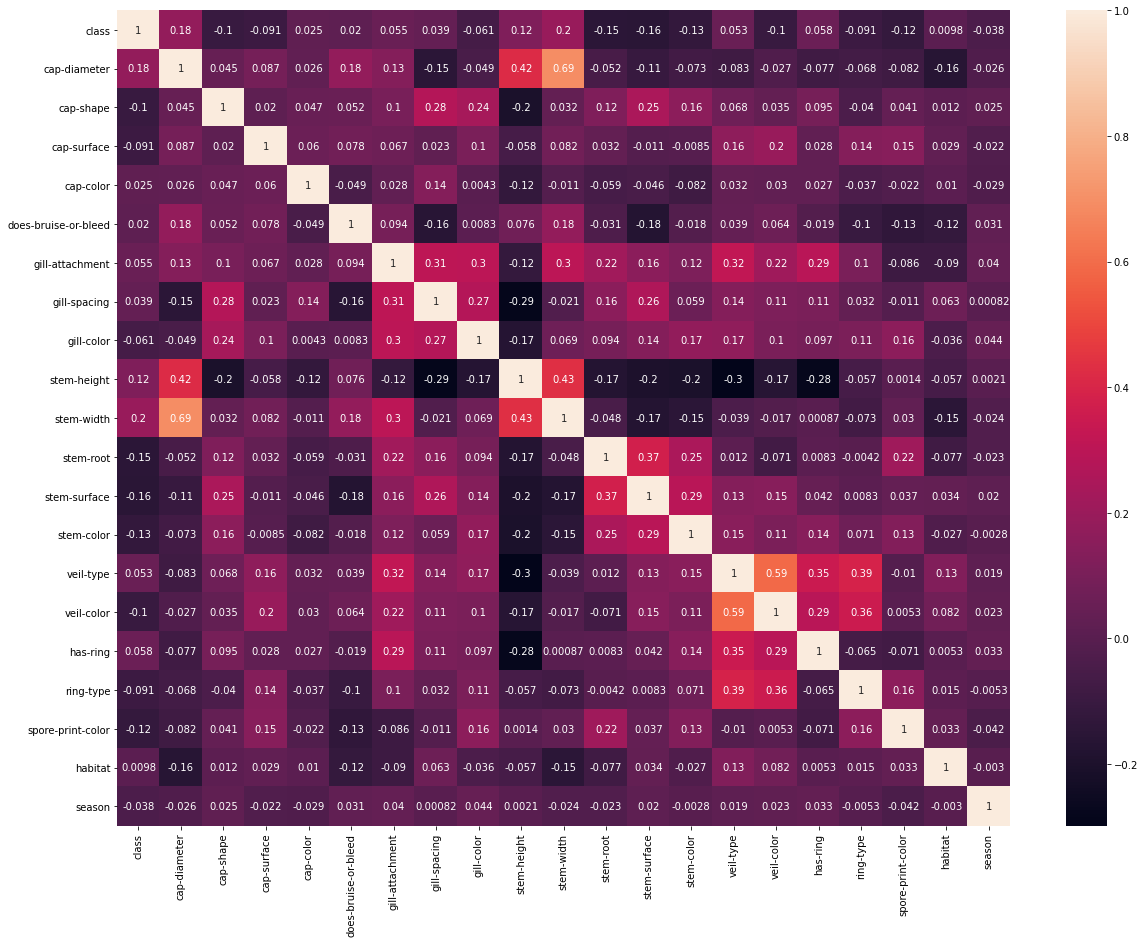

In [6]:
#Making a correlation matrix to understand the correlations between different attributes
plt.figure(figsize= (20,15))
sn.heatmap(mushroom_df.corr(), annot=True)

In [7]:
#Dropping columns that have more than 50% missing values
mushroom_df2=mushroom_df.drop(columns=['stem-root','stem-surface','veil-type','veil-color','spore-print-color'])
mushroom_df2

class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          0            15          0            0          0   
1          0            16          0            0          0   
2          0            14          0            0          0   
3          0            14          1            1          1   
4          0            14          0            1          0   
...      ...           ...        ...          ...        ...   
61064      0             1          5            6          6   
61065      0             1          1            6          6   
61066      0             1          5            6          6   
61067      0             1          1            6          6   
61068      0             1          5            6          6   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                         0                0             0           0   
1                         0                0             0           0   
2                         0                0             0           0   
3                         0                0             0           0   
4                         0                0             0           0   
...                     ...              ...           ...         ...   
61064                     0                7             3          11   
61065                     0                7             3          11   
61066                     0                7             3          11   
61067                     0                7             3          11   
61068                     0                7             3          11   

       stem-height  stem-width  stem-color  has-ring  ring-type  habitat  \
0               16          17           0         0          0        0   
1               17          18           0         0          0        0   
2               17          17           0         0          0        0   
3               15          15           0         0          1        0   
4               16          17           0         0          1        0   
...            ...         ...         ...       ...        ...      ...   
61064            3           6           1         1          4        0   
61065            3           5           1         1          4        0   
61066            3           6           1         1          4        0   
61067            3           5           1         1          4        0   
61068            3           5           1         1          4        0   

       season  
0           0  
1           1  
2           0  
3           0  
4           0  
...       ...  
61064       2  
61065       2  
61066       1  
61067       1  
61068       1  

[61069 rows x 16 columns]

<AxesSubplot:>

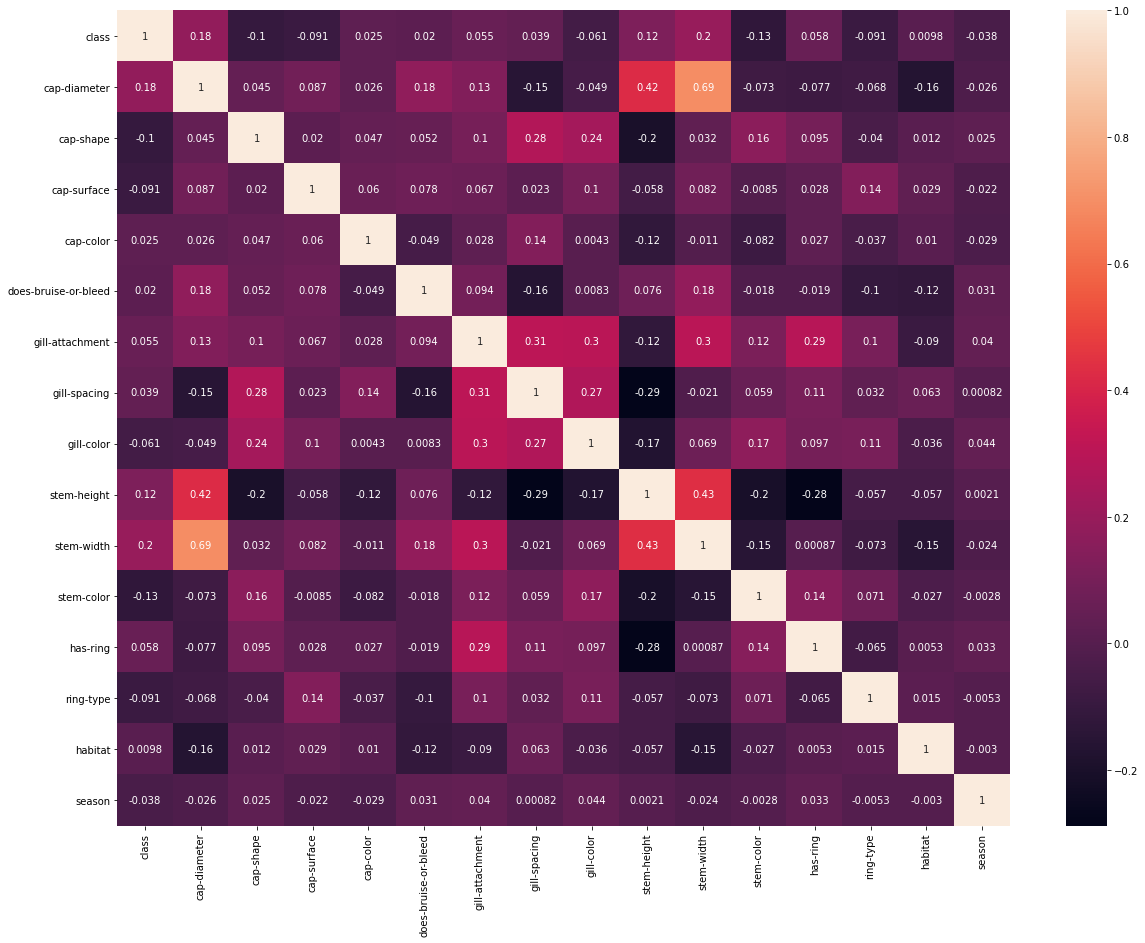

In [8]:
#Making a correlation matrix to understand the correlations between different attributes after eliminating the columns
plt.figure(figsize= (20,15))
sn.heatmap(mushroom_df2.corr(), annot=True)

### Exploratory Data Analysis

<Figure size 720x432 with 0 Axes>

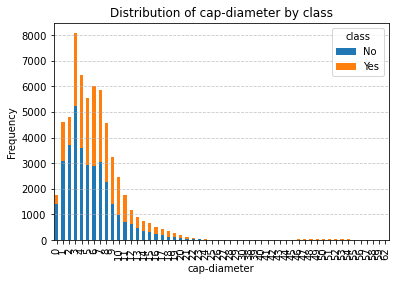

<Figure size 720x432 with 0 Axes>

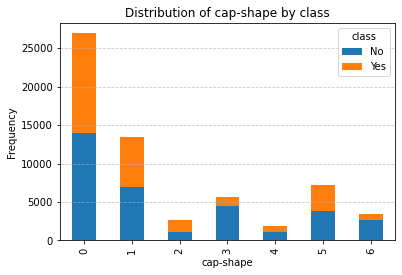

<Figure size 720x432 with 0 Axes>

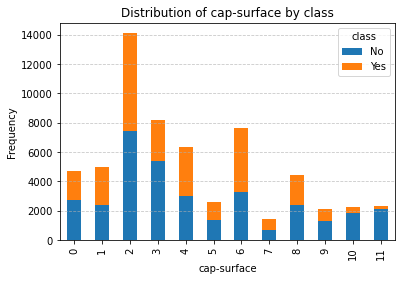

<Figure size 720x432 with 0 Axes>

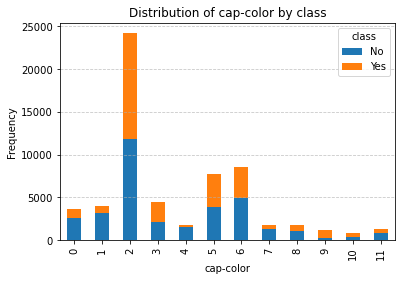

<Figure size 720x432 with 0 Axes>

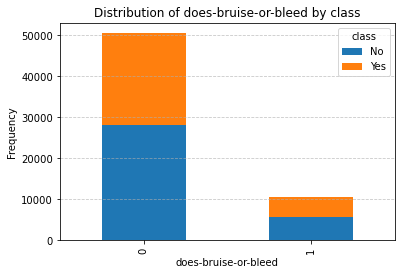

<Figure size 720x432 with 0 Axes>

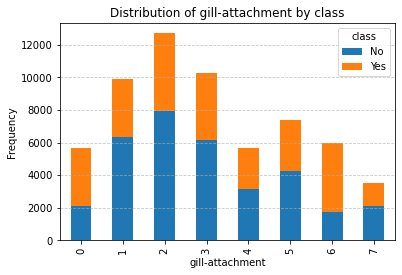

<Figure size 720x432 with 0 Axes>

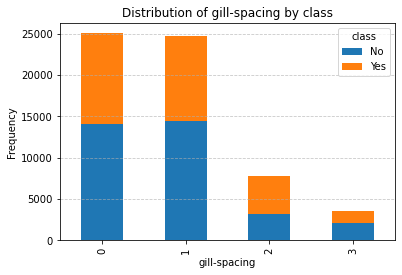

<Figure size 720x432 with 0 Axes>

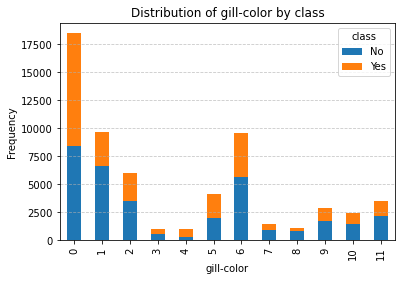

<Figure size 720x432 with 0 Axes>

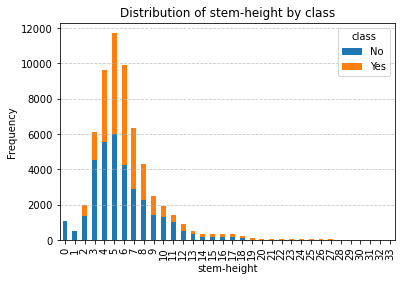

<Figure size 720x432 with 0 Axes>

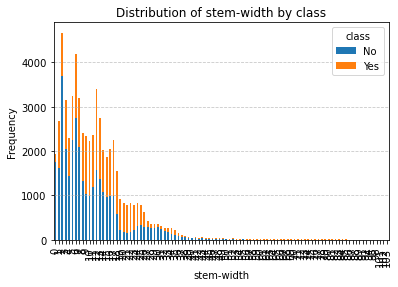

<Figure size 720x432 with 0 Axes>

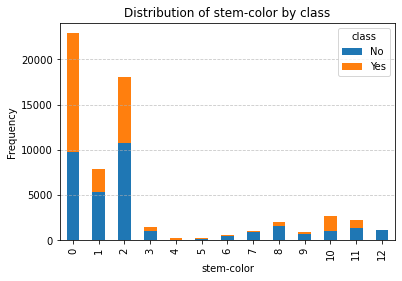

<Figure size 720x432 with 0 Axes>

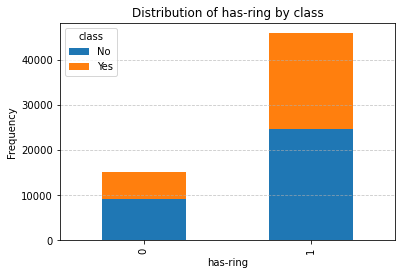

<Figure size 720x432 with 0 Axes>

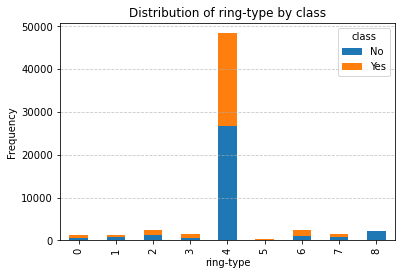

<Figure size 720x432 with 0 Axes>

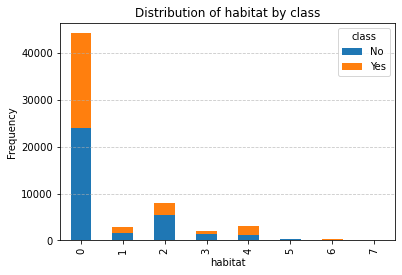

<Figure size 720x432 with 0 Axes>

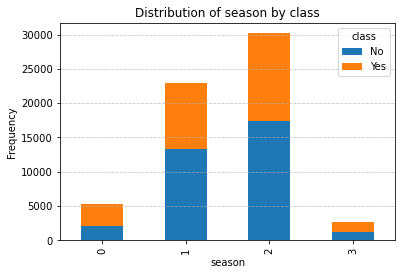

In [9]:
#Selecting all attributes except Class for comparison
attributes = mushroom_df2.columns.drop('class')

#Plottig bar graphs for each attribute compared to Class
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    mushroom_df2.groupby([attribute, 'class']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {attribute} by class')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='class', labels=['No', 'Yes'])
    plt.show()

In [10]:
mushroom_df2.describe()

class  cap-diameter     cap-shape   cap-surface     cap-color  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       0.445087      6.237551      1.629665      4.159344      3.626373   
std        0.496979      5.274608      2.005243      2.992339      2.544282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      3.000000      0.000000      2.000000      2.000000   
50%        0.000000      5.000000      1.000000      3.000000      2.000000   
75%        1.000000      8.000000      3.000000      6.000000      6.000000   
max        1.000000     62.000000      6.000000     11.000000     11.000000   

       does-bruise-or-bleed  gill-attachment  gill-spacing    gill-color  \
count          61069.000000     61069.000000  61069.000000  61069.000000   
mean               0.173410         3.052187      0.832370      3.495128   
std                0.378605         2.018000      0.860638      3.609613   
min                0.000000         0.000000      0.000000      0.000000   
25%                0.000000         1.000000      0.000000      0.000000   
50%                0.000000         3.000000      1.000000      2.000000   
75%                0.000000         5.000000      1.000000      6.000000   
max                1.000000         7.000000      3.000000     11.000000   

        stem-height    stem-width    stem-color      has-ring     ring-type  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       6.093141     11.660957      2.418052      0.751445      4.047684   
std        3.367266     10.030517      3.369490      0.432179      1.273043   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.000000      5.000000      0.000000      1.000000      4.000000   
50%        5.000000     10.000000      1.000000      1.000000      4.000000   
75%        7.000000     16.000000      2.000000      1.000000      4.000000   
max       33.000000    103.000000     12.000000      1.000000      8.000000   

            habitat        season  
count  61069.000000  61069.000000  
mean       0.691087      1.497208  
std        1.289632      0.715404  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      2.000000  
max        7.000000      3.000000

In [11]:
mushroom_df2.mode()

class  cap-diameter  cap-shape  cap-surface  cap-color  \
0      0             3          0            2          2   

   does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                     0                2             0           0   

   stem-height  stem-width  stem-color  has-ring  ring-type  habitat  season  
0            5           2           0         1          4        0       2

In [12]:
#Replacing missing numeric data with mean values
columns_to_fill = ['gill-attachment', 'gill-spacing', 'ring-type']

for col in columns_to_fill:
    median_val = mushroom_df2[col].median()
    mushroom_df2[col].fillna(median_val, inplace=True)

In [13]:
#Replacing missing categorical data with mode values
column_to_fill = ['cap-surface']
for col in column_to_fill:
    fill_val = 4
    mushroom_df2[col].fillna(fill_val, inplace=True)

In [14]:
#Validating that there are no missing values
missing_values2 = mushroom_df2.isnull().sum()
missing_values2

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### Analytical Models

#### Logistic Regression

In [15]:
#Features and target variable
X = mushroom_df2.drop(columns=['class'])
y = mushroom_df2['class']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)#Making predictions
X2 = sm.add_constant(X_train)#Displayng the Logistic Regression summary
est = sm.Logit(y_train, X2)
est2 = est.fit()
print(est2.summary())

#Evaluating the logistic regression model
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Precision:", precision_score(y_test, logistic_predictions, zero_division=1))
print("Recall:", recall_score(y_test, logistic_predictions))

Optimization terminated successfully.
         Current function value: 0.635394
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                48855
Model:                          Logit   Df Residuals:                    48839
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 May 2024   Pseudo R-squ.:                 0.07563
Time:                        20:10:01   Log-Likelihood:                -31042.
converged:                       True   LL-Null:                       -33582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3948      0.056     -7.024      0.000      -0.505      -0.285

In [16]:
#5 Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Features and target variable
X = mushroom_df2.drop(columns=['class'])
y = mushroom_df2['class']

#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Creating and training the logistic regression model
logistic_model_with_cv = LogisticRegression(max_iter=1000)

#Performing cross-validation
cv_scores = cross_val_score(logistic_model_with_cv, X_scaled, y, cv=5) 

#Evaluating cross-validation scores
print("Cross-Validation Accuracy Scores:")
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

Cross-Validation Accuracy Scores:
Mean Accuracy: 0.5452524979254818
Standard Deviation of Accuracy: 0.08047722709094313


In [17]:
#Backward Elimination
import statsmodels.api as sm

#Defining the function
def backward_elimination(X, y, significance_level=0.05):
    num_features = X.shape[1]
    const = np.ones((X.shape[0], 1))
    while True:
        X_with_const = np.concatenate((const, X), axis=1)
        model = sm.Logit(y, X_with_const).fit()
        max_p_value = np.max(model.pvalues[1:])
        if max_p_value > significance_level:
            max_feature_idx = np.argmax(model.pvalues[1:])  
            X = np.delete(X, max_feature_idx, axis=1)
        else:
            break
    selected_features = np.arange(X.shape[1]) 
    return selected_features

#Performing backward elimination
selected_feature_indices = backward_elimination(X_train_scaled, y_train)
selected_features = X_train.columns[selected_feature_indices]
print("Selected features:", selected_features)

#Filtering the training and test datasets with selected features
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

#Training the logistic regression model with selected features
logistic_model_selected = LogisticRegression(max_iter=1000)
logistic_model_selected.fit(X_train_selected, y_train)
logistic_predictions_selected = logistic_model_selected.predict(X_test_selected)

#Evaluating the logistic regression model with selected features
print("\nLogistic Regression Model Performance with Selected Features:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions_selected))
print("Precision:", precision_score(y_test, logistic_predictions_selected))
print("Recall:", recall_score(y_test, logistic_predictions_selected))

Optimization terminated successfully.
         Current function value: 0.635394
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635399
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635425
         Iterations 5
Selected features: Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type'],
      dtype='object')

Logistic Regression Model Performance with Selected Features:
Accuracy: 0.6164237759947601
Precision: 0.5763688760806917
Recall: 0.48381094157052473


In [18]:
#Ridge Model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and training the logistic regression model with L2 regularization
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

#Evaluating the Ridge regression model
print("\nRidge Regression Model Performance:")
print("R2 Score:", ridge_model.score(X_test_scaled, y_test))


Ridge Regression Model Performance:
R2 Score: 0.09794149502533789


In [19]:
#Feature Selection
from sklearn.feature_selection import RFE

#Initializing logistic regression model
logistic_model_RFE = LogisticRegression(max_iter=1000)

#Initializing RFE selector
selector = RFE(logistic_model_RFE, n_features_to_select=5)  # Select 5 features

#Fitting RFE selector
selector.fit(X_train_scaled, y_train)

#Getting selected features
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['cap-diameter', 'cap-shape', 'cap-surface', 'gill-spacing',
       'stem-width'],
      dtype='object')


In [20]:
#Initializing the logistic regression model with RFE Selector
logistic_model_RFE = LogisticRegression(max_iter=1000)

#Initializing the RFE selector
selector = RFE(logistic_model_RFE, n_features_to_select=5)  # Select 5 features

#Fitting RFE selector
selector.fit(X_train_scaled, y_train)

#Getting selected features
selected_features = X.columns[selector.support_]

#Training the logistic regression model on selected features
logistic_model_selected_RFE = LogisticRegression(max_iter=1000)
logistic_model_selected_RFE.fit(X_train_scaled[:, selector.support_], y_train)

#Making predictions on the test set
logistic_predictions_selected_RFE = logistic_model_selected_RFE.predict(X_test_scaled[:, selector.support_])

#Evaluating the logistic regression model with selected features
accuracy = accuracy_score(y_test, logistic_predictions_selected_RFE)
print("Logistic Regression Model Performance with Selected Features:")
print("Accuracy:", accuracy)

Logistic Regression Model Performance with Selected Features:
Accuracy: 0.5943179957425905


#### Decision Tree

In [21]:
#Finding outliers for each variable
def find_outliers_zscore(data):
    outliers = {}
    for variable, values in mushroom_df2.items():
        z_scores = np.abs((values - values.mean()) / values.std())
        outliers[variable] = np.where(z_scores > 3)[0].tolist()
    return outliers
outliers = find_outliers_zscore(mushroom_df2)

#Printing outliers for each variable
for variable, indices in outliers.items():
    print(f"Outliers for '{variable}': {indices}")

Outliers for 'class': []
Outliers for 'cap-diameter': [2833, 2855, 2897, 2937, 3002, 3167, 25164, 25198, 25236, 25239, 27512, 48364, 48366, 48372, 48393, 48403, 48419, 48434, 48435, 48453, 48456, 48457, 48478, 48483, 48491, 48499, 48501, 48504, 48505, 48552, 48555, 48563, 48577, 48588, 48597, 48609, 48613, 48615, 48618, 48633, 48634, 48639, 48645, 48659, 48660, 48662, 48675, 48681, 48682, 48686, 48689, 48695, 48702, 48704, 48708, 51585, 51613, 51632, 51716, 51791, 51839, 51878, 53683, 53708, 53868, 53910, 53949, 58245, 58246, 58247, 58248, 58249, 58250, 58251, 58252, 58253, 58254, 58255, 58256, 58257, 58258, 58259, 58260, 58261, 58262, 58263, 58264, 58265, 58266, 58267, 58268, 58269, 58270, 58271, 58272, 58273, 58274, 58275, 58276, 58277, 58278, 58279, 58280, 58281, 58282, 58283, 58284, 58285, 58286, 58287, 58288, 58289, 58290, 58291, 58292, 58293, 58294, 58295, 58296, 58297, 58298, 58299, 58300, 58301, 58302, 58303, 58304, 58305, 58306, 58307, 58308, 58309, 58310, 58311, 58312, 58313,

In [22]:
#Finding the number of outliers for each variable
def count_outliers_zscore(mushroom_df2):
    outlier_counts = {}
    for variable, values in mushroom_df2.items():
        z_scores = np.abs((values - values.mean()) / values.std())
        outlier_counts[variable] = np.sum(z_scores > 3)
    return outlier_counts
outlier_counts = count_outliers_zscore(mushroom_df2)

#Printing the number of outliers for each variable
for variable, count in outlier_counts.items():
    print(f"Number of outliers for '{variable}': {count}")

Number of outliers for 'class': 0
Number of outliers for 'cap-diameter': 477
Number of outliers for 'cap-shape': 0
Number of outliers for 'cap-surface': 0
Number of outliers for 'cap-color': 0
Number of outliers for 'does-bruise-or-bleed': 0
Number of outliers for 'gill-attachment': 0
Number of outliers for 'gill-spacing': 0
Number of outliers for 'gill-color': 0
Number of outliers for 'stem-height': 1130
Number of outliers for 'stem-width': 871
Number of outliers for 'stem-color': 0
Number of outliers for 'has-ring': 0
Number of outliers for 'ring-type': 3358
Number of outliers for 'habitat': 828
Number of outliers for 'season': 0


In [23]:
from sklearn.tree import DecisionTreeClassifier

#Creating the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

#Training the Decision Tree classifier
decision_tree.fit(X_train_scaled, y_train)

#Making predictions
decision_tree_predictions = decision_tree.predict(X_test_scaled)

#Evaluating the performance of the Decision Tree model
print("\nDecision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Precision:", precision_score(y_test, decision_tree_predictions))
print("Recall:", recall_score(y_test, decision_tree_predictions))


Decision Tree Model Performance:
Accuracy: 0.9982806615359424
Precision: 0.9972134497492104
Recall: 0.9988835132117603


In [24]:
from sklearn.tree import plot_tree

#Plotting the decision tree
plt.figure(figsize=(200, 100))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['edible', 'poisonous'], fontsize=10)
plt.show()

In [25]:
#Creating a Decision Tree classifier with pruning parameters
pruned_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=5)

#Training the pruned Decision Tree classifier
pruned_decision_tree.fit(X_train_scaled, y_train)

#Making predictions
pruned_decision_tree_predictions = pruned_decision_tree.predict(X_test_scaled)

#Evaluating the performance pruned Decision Tree model
print("\nPruned Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, pruned_decision_tree_predictions))


Pruned Decision Tree Model Performance:
Accuracy: 0.7348125102341575


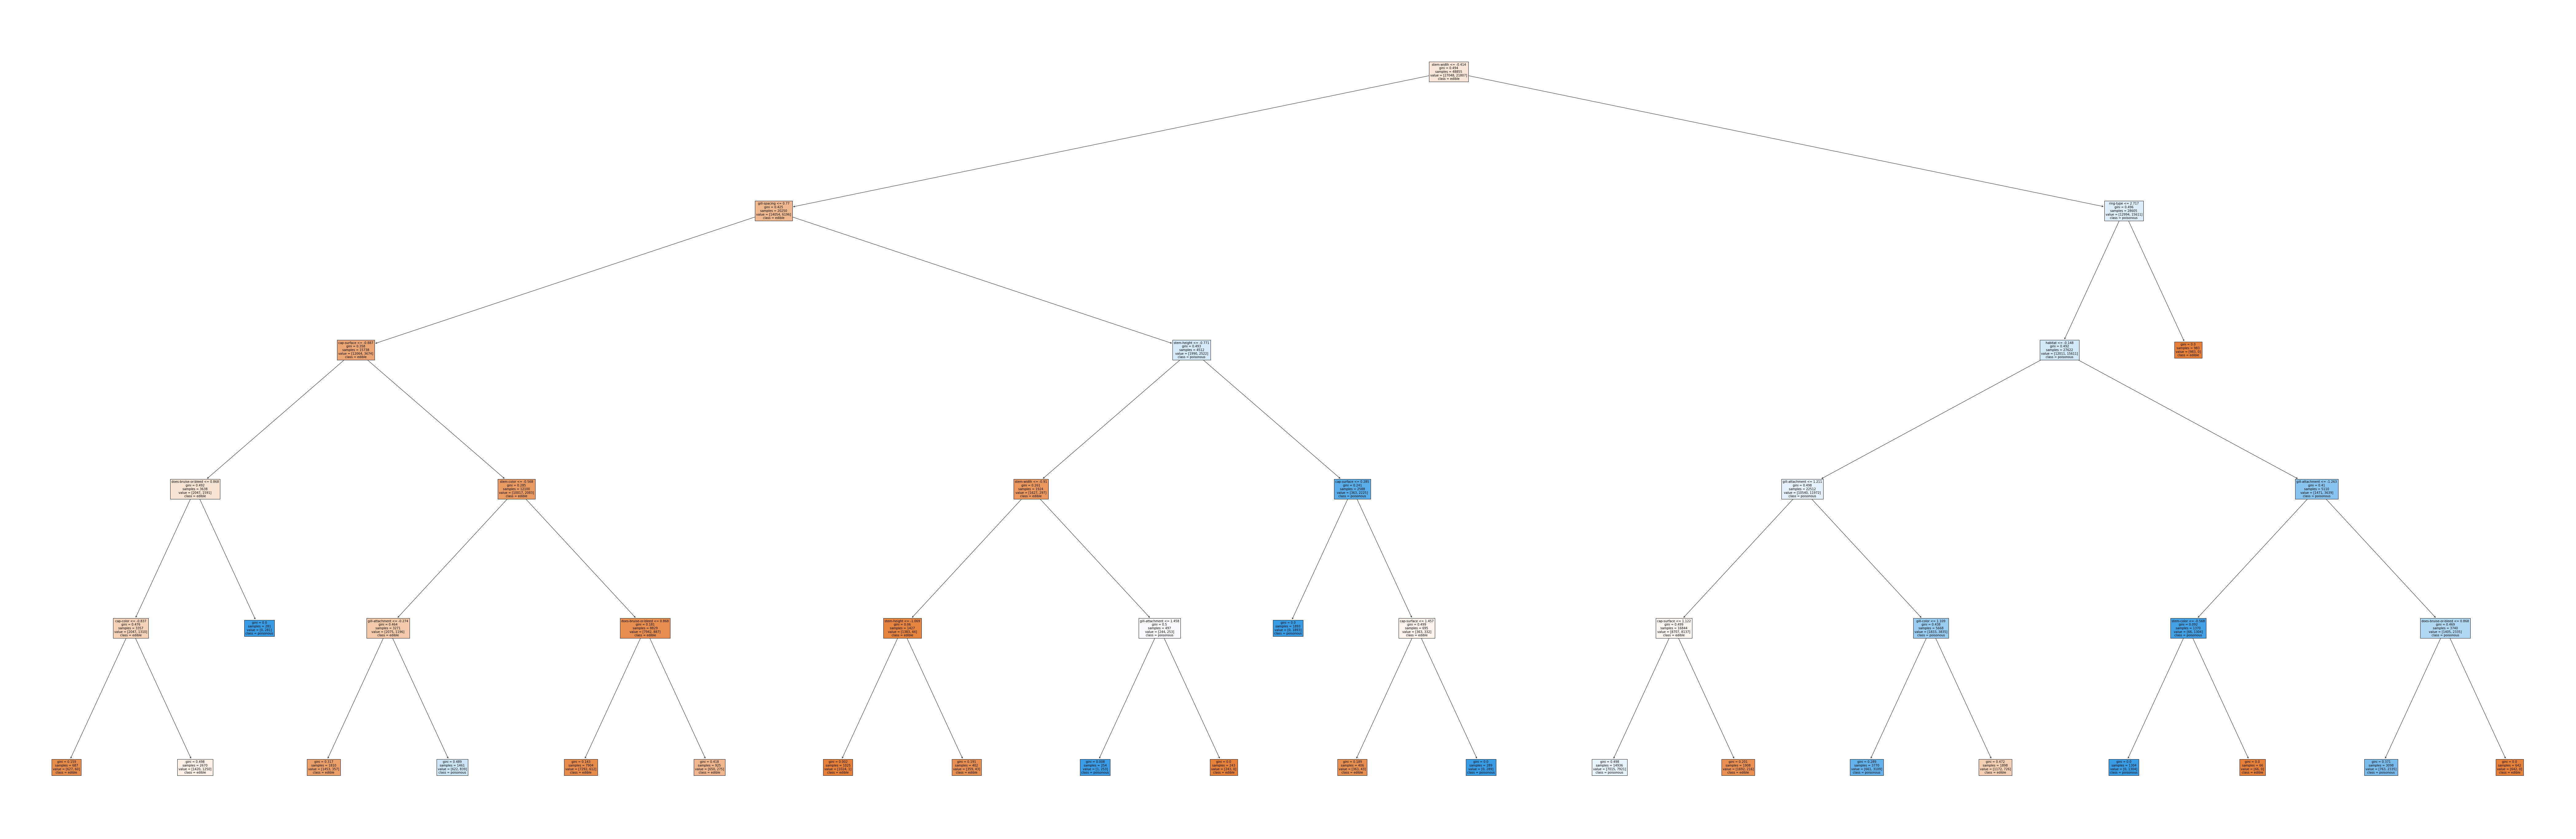

In [26]:
from sklearn.tree import plot_tree

#Plotting the pruned decision tree
plt.figure(figsize=(150, 50))
plot_tree(pruned_decision_tree, filled=True, feature_names=X.columns, class_names=['edible', 'poisonous'], fontsize=10)
plt.show()

#### KNN Model

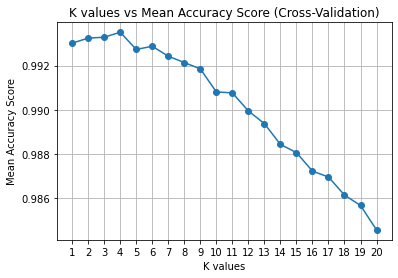

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Identifying the columns with outliers
columns_with_outliers = ['cap-diameter', 'stem-height', 'stem-width', 'ring-type', 'habitat']

#Filtering out columns with outliers and the 'class' column
columns_to_drop = columns_with_outliers + ['class']

#Extracting the features without outliers and 'class'
X_filtered = mushroom_df2.drop(columns=columns_to_drop).values

#Defining the target variable
y = mushroom_df2['class'].values

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Defining the range of K values
k_values = range(1, 21)  # K values from 1 to 20

#Initializing the lists to store mean accuracy scores for different K values
mean_accuracy_scores = []

#Looping over different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_scores = cross_val_score(knn, X_train, y_train, cv=5)  
    mean_accuracy = np.mean(accuracy_scores)
    
    # Append mean accuracy score to the list
    mean_accuracy_scores.append(mean_accuracy)

#Plotting K values vs mean accuracy scores
plt.plot(k_values, mean_accuracy_scores, marker='o')
plt.title('K values vs Mean Accuracy Score (Cross-Validation)')
plt.xlabel('K values')
plt.ylabel('Mean Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [36]:
#Running the KNN with the optimal k value
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

#Defining the columns with outliers
columns_with_outliers = ['cap-diameter', 'stem-height', 'stem-width', 'ring-type', 'habitat']

#Filtering out the columns with outliers and the 'class' column
columns_to_drop = columns_with_outliers + ['class']

#Extracting features without outliers and 'class'
X = mushroom_df2.drop(columns=columns_to_drop)
y = mushroom_df2['class']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)

#Fitting the classifier to the training data
knn.fit(X_train, y_train)

#Making predictions on the test data
y_pred = knn.predict(X_test)

#Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Printing the results
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9956379498364231
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       506
           1       1.00      1.00      1.00       411

    accuracy                           1.00       917
   macro avg       1.00      1.00      1.00       917
weighted avg       1.00      1.00      1.00       917



## Confusion Matrices

In [37]:
#Creating a function for the confusion matrix
from sklearn import metrics
def draw_cm( actual, predicted ):
    # The matrix will oriented as [1,0] 
    # i.e. the classes with label 1 will be reprensted the first row and 0 as second  row
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Edible", "Poisoneus"] ,
    yticklabels = ["Edible", "Poisoneus"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


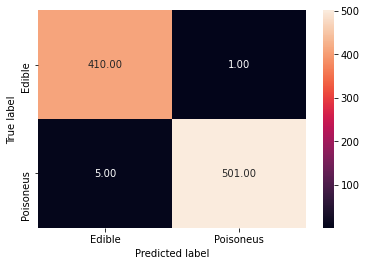

In [38]:
#Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

#Initializing the classifier
knn_clf = KNeighborsClassifier()

#Fitting the model with the training set
knn_clf.fit(X_train, y_train)

#Predicting on the test set
pred_y = knn_clf.predict(X_test)

#Drawing the confusion matrix for KNN model
draw_cm(y_test, pred_y)

/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


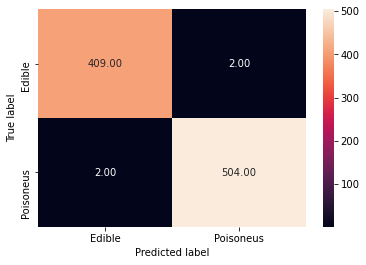

In [39]:
#Initializing the classifier
decision_tree = DecisionTreeClassifier()

#Fitting the model with the training set
decision_tree.fit(X_train, y_train)

#Predicting on the test set
pred_y = decision_tree.predict(X_test)

#Drawing the confusion matrix for Decision tree model
draw_cm(y_test, pred_y)

/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


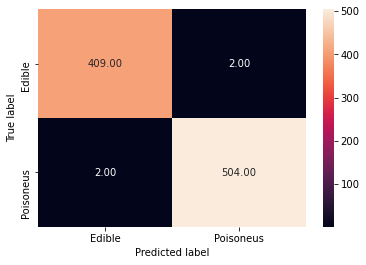

In [40]:
#Initializing the classifier
pruned_decision_tree = DecisionTreeClassifier()

#Fitting the model with the training set
pruned_decision_tree.fit(X_train, y_train)

#Predicting on test set
pred_y = pruned_decision_tree.predict(X_test)

#Drawing the confusion matrix for the pruned decision tree model
draw_cm(y_test, pred_y)

/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


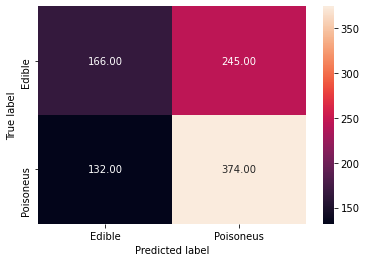

In [41]:
#Fitting the model with the training set
logistic_model_with_cv.fit(X_train, y_train)

#Predicting on test set
pred_y = logistic_model_with_cv.predict(X_test)

#Drawing the confusion matrix for the logistic regression model
draw_cm(y_test, pred_y)

/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


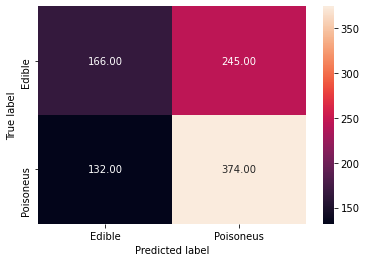

In [42]:
#Fitting the model with the training set
logistic_model_selected_RFE.fit(X_train, y_train)

#Predicting on test set
pred_y = logistic_model_selected_RFE.predict(X_test)

#Drawing the confusion matrix for the RFE logistic regression model
draw_cm(y_test, pred_y)


/Users/abiramisouvami/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


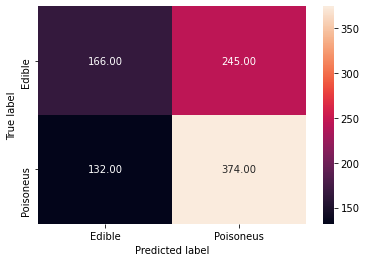

In [35]:
#Fitting the model with the training set
logistic_model_selected.fit(X_train, y_train)

#Predicting on test set
pred_y = logistic_model_selected.predict(X_test)

#Drawing the confusion matrix for  model
draw_cm(y_test, pred_y)